In [13]:
import pandas as pd

# Replace with the raw URL of your CSV file on GitHub
github_csv_url = 'https://raw.githubusercontent.com/RohitDatta06/FPLpredict/refs/heads/main/merged_gw%20-%20merged_gw.csv.csv?token=GHSAT0AAAAAADKDRJVP5DHVNJNQ5BHP74D22IAADNA'

try:
  df = pd.read_csv(github_csv_url)
  print("CSV file loaded successfully into a pandas DataFrame.")
  display(df.head()) # Display the first few rows of the DataFrame
except Exception as e:
  print(f"Error loading CSV from URL: {e}")

Error loading CSV from URL: HTTP Error 404: Not Found


In [14]:
import numpy as np

# Define the columns to keep for each position, including the requested columns
shared_cols = ['name', 'position', 'element', 'fixture', 'oppoine',
               'opponentposition', 'was_home', 'difficulty', 'minutes', 'starts',
               'goals_scored', 'assists', 'expected_goals', 'expected_assists',
               'expected_goal_involvements', 'threat', 'influence', 'creativity',
               'ict_index', 'own_goals', 'yellow_cards', 'red_cards', 'bonus',
               'bps', 'total_points', 'value','xP', 'team_a_score',
               'team_h_score', 'playerteamposition']

forwards_cols = shared_cols + ['penalties_missed']

midfielders_cols = shared_cols + ['clean_sheets', 'expected_goals_conceded', 'goals_conceded']

defenders_cols = shared_cols + ['clean_sheets', 'expected_goals_conceded', 'goals_conceded']

goalkeepers_cols = shared_cols + ['clean_sheets', 'goals_conceded', 'expected_goals_conceded', 'saves', 'penalties_saved']


# Select the specified columns for each DataFrame and filter by position
forwards_df = df[df['position'] == 'FWD'][forwards_cols].copy()
midfielders_df = df[df['position'] == 'MID'][midfielders_cols].copy()
defenders_df = df[df['position'] == 'DEF'][defenders_cols].copy()
goalkeepers_df = df[df['position'] == 'GK'][goalkeepers_cols].copy()


# Swap difficulty values 1 and 3 and convert boolean to int
for df_pos in [forwards_df, midfielders_df, defenders_df, goalkeepers_df]:
    df_pos['difficulty'] = df_pos['difficulty'].replace({1: 3, 3: 1})
    for col in df_pos.columns:
        if df_pos[col].dtype == 'bool':
            df_pos[col] = df_pos[col].astype(int)
    # Replace 'PROMOTED' with a random number (18, 19, or 20) in 'playerteamposition'
    promoted_indices_player = df_pos[df_pos['playerteamposition'] == 'PROMOTED'].index
    df_pos.loc[promoted_indices_player, 'playerteamposition'] = np.random.choice([18, 19, 20], size=len(promoted_indices_player))
    # Replace 'PROMOTED' with a random number (18, 19, or 20) in 'opponentposition'
    promoted_indices_opponent = df_pos[df_pos['opponentposition'] == 'PROMOTED'].index
    df_pos.loc[promoted_indices_opponent, 'opponentposition'] = np.random.choice([18, 19, 20], size=len(promoted_indices_opponent))
    # Convert 'playerteamposition' and 'opponentposition' to numeric, coercing errors
    df_pos['playerteamposition'] = pd.to_numeric(df_pos['playerteamposition'], errors='coerce')
    df_pos['opponentposition'] = pd.to_numeric(df_pos['opponentposition'], errors='coerce')


print("Updated DataFrames with relevant columns and swapped difficulty values:")
print("\nForwards DataFrame (Head):")
display(forwards_df.head())
print("\nForwards DataFrame (Sample):")
display(forwards_df.sample(5))

print("\nMidfielders DataFrame (Head):")
display(midfielders_df.head())
print("\nMidfielders DataFrame (Sample):")
display(midfielders_df.sample(5))

print("\nDefenders DataFrame (Head):")
display(defenders_df.head())
print("\nDefenders DataFrame (Sample):")
display(defenders_df.sample(5))

print("\nGoalkeepers DataFrame (Head):")
display(goalkeepers_df.head())
print("\nGoalkeepers DataFrame (Sample):")
display(goalkeepers_df.sample(5))

NameError: name 'df' is not defined

In [ ]:
print("Forwards DataFrame columns:")
print(forwards_df.columns.tolist())

print("\nMidfielders DataFrame columns:")
print(midfielders_df.columns.tolist())

print("\nDefenders DataFrame columns:")
print(defenders_df.columns.tolist())

print("\nGoalkeepers DataFrame columns:")
print(goalkeepers_df.columns.tolist())

Forwards DataFrame columns:
['name', 'position', 'element', 'fixture', 'oppoine', 'opponentposition', 'was_home', 'difficulty', 'minutes', 'starts', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'threat', 'influence', 'creativity', 'ict_index', 'own_goals', 'yellow_cards', 'red_cards', 'bonus', 'bps', 'total_points', 'value', 'xP', 'team_a_score', 'team_h_score', 'playerteamposition', 'penalties_missed']

Midfielders DataFrame columns:
['name', 'position', 'element', 'fixture', 'oppoine', 'opponentposition', 'was_home', 'difficulty', 'minutes', 'starts', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'threat', 'influence', 'creativity', 'ict_index', 'own_goals', 'yellow_cards', 'red_cards', 'bonus', 'bps', 'total_points', 'value', 'xP', 'team_a_score', 'team_h_score', 'playerteamposition', 'clean_sheets', 'expected_goals_conceded', 'goals_conceded']

Defenders DataFrame columns:
['name', 'p

Best model: XGBoost for Forwards


,Model,RMSE,R²
2,XGBoost,0.211650,0.992536
1,Random Forest,0.245052,0.989994
0,Linear Regression,0.246889,0.989844


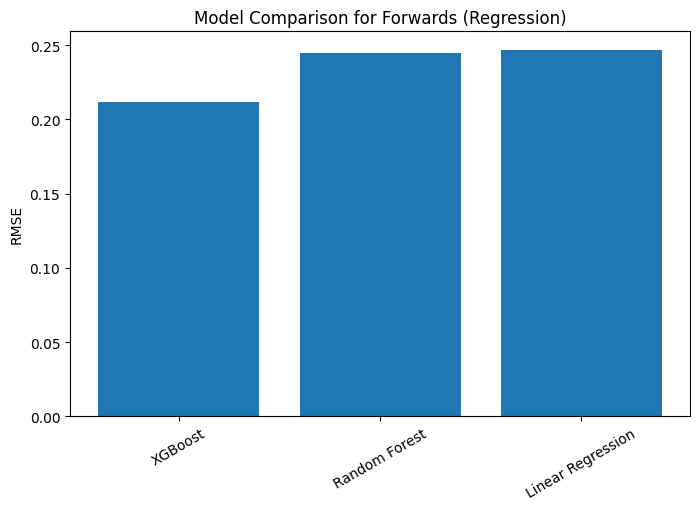

Best model: XGBoost for Midfielders


,Model,RMSE,R²
2,XGBoost,0.223300,0.990894
0,Linear Regression,0.246764,0.988880
1,Random Forest,0.257893,0.987854


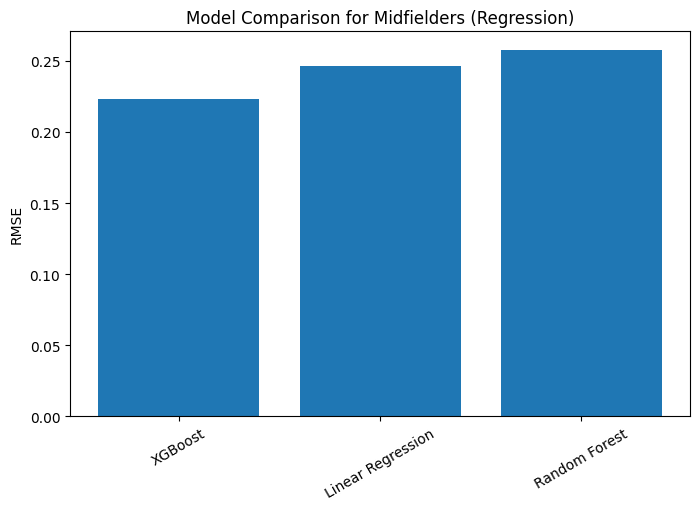

Best model: XGBoost for Defenders


,Model,RMSE,R²
2,XGBoost,0.206184,0.990602
0,Linear Regression,0.233796,0.987916
1,Random Forest,0.259490,0.985114


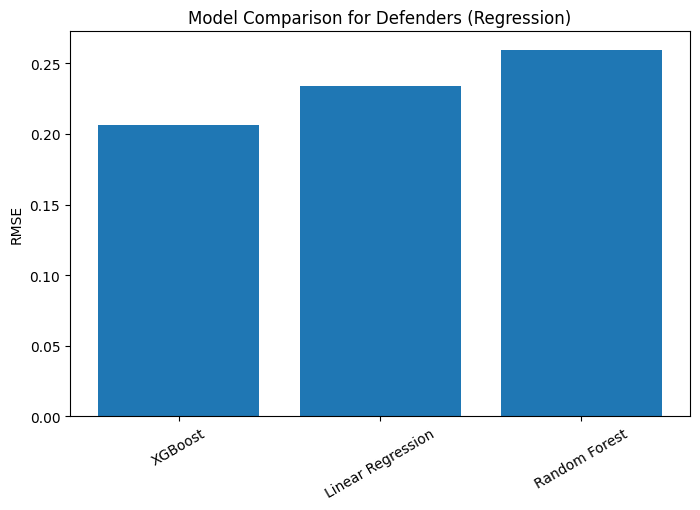

Best model: Linear Regression for Goalkeepers


,Model,RMSE,R²
0,Linear Regression,0.188313,0.992116
2,XGBoost,0.263965,0.984509
1,Random Forest,0.339396,0.974390


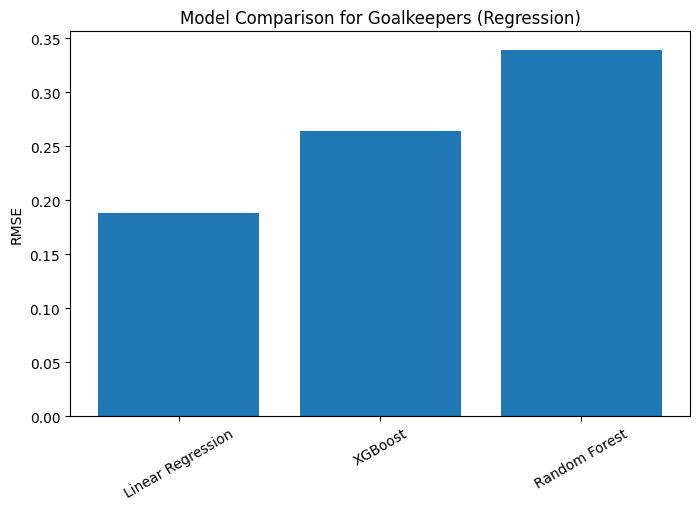

In [ ]:
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

def prepare_data(df, target_col, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_col]).select_dtypes(include=['number'])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

def validate_and_compare(models, X_train, X_test, y_train, y_test, task='regression'):
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if task == 'regression':
            rmse = root_mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results.append({'Model': name, 'RMSE': rmse, 'R²': r2})
        else:
            acc = accuracy_score(y_test, y_pred)
            results.append({'Model': name, 'Accuracy': acc})

    results_df = pd.DataFrame(results)
    metric = 'RMSE' if task == 'regression' else 'Accuracy'
    results_df.sort_values(by=metric, ascending=(task=='regression'), inplace=True)
    best_model_name = results_df.iloc[0]['Model']
    best_model = models[best_model_name]
    
    return results_df, best_model_name, best_model

def get_models(task='regression'):
    if task == 'regression':
        models = {
            "Linear Regression": LinearRegression(),
            "Random Forest": RandomForestRegressor(random_state=42),
            "XGBoost": xgb.XGBRegressor(random_state=42, n_estimators=200),
            "Lasso Regression": Lasso(.1)
        }
    elif task == 'classification':
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Random Forest": RandomForestClassifier(random_state=42),
            "XGBoost": xgb.XGBClassifier(random_state=42, n_estimators=200),
            "Lasso Regression": Lasso(.1)
        }
    else:
        raise ValueError("task must be 'regression' or 'classification'")
    return models

def plot_results(results_df, position, task='regression'):
    metric = 'RMSE' if task == 'regression' else 'Accuracy'
    plt.figure(figsize=(8, 5))
    plt.bar(results_df['Model'], results_df[metric])
    plt.ylabel(metric)
    plt.title(f'Model Comparison for {position} ({task.title()})')
    plt.xticks(rotation=30)
    plt.show()

position_dfs = [forwards_df, midfielders_df, defenders_df, goalkeepers_df]
positions = ["Forwards", "Midfielders", "Defenders", "Goalkeepers"]
for i in range(4):
    X_train, X_test, y_train, y_test = prepare_data(position_dfs[i], target_col='total_points')

    models = get_models(task='regression')  # or 'classification'
    results_df, best_model_name, best_model = validate_and_compare(
        models, X_train, X_test, y_train, y_test, task='regression'
    )

    print(f"Best model: {best_model_name} for {positions[i]}")
    display(results_df)
    plot_results(results_df, positions[i], task='regression')